# LAB 4. BIẾN NGẪU NHIÊN LIÊN TỤC (tiếp)
### Xác suất cho Khoa học dữ liệu. Ngày 13/04/2022.

## 1. PHÂN BỐ CHUẨN (GAUSS).

Đại lượng ngẫu nhiên $Z$ có phân bố chuẩn tắc (standard normal distribution) nếu hàm mật độ xác suất của nó là $$f(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}.$$
Đồ thị của nó có dạng hình chuông, đối xứng qua trục tung và đạt cực đại tại $x=0$ như bên dưới
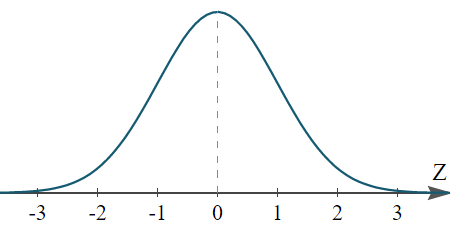
Ta chứng minh được kỳ vọng, mod và median của $Z$ đều là $0$, còn phương sai là $1$. Đây là một phân bố đẹp, mang tính tổng quát cho nhiều tình huống trong thực tế. Nó còn giúp ta xấp xỉ được nhiều phân phối khác. <br>
Bên cạnh đó, nếu ký hiệu $\Phi (x)$ là hàm phân bố xác suất của $f(x)$, cũng chính là nguyên hàm của $\Phi(x)$ thì hàm này có tính chất là $$\Phi (-x) = 1 - \Phi (x).$$
Tuy nhiên, ta không biểu diễn được biểu thức tường minh của hàm này mà thông thường, ta phải tra bảng công thức. 

Phân bố chuẩn (normal distribution): đại lượng ngẫu nhiên $X$ có phân bố chuẩn với tham số kỳ vọng, phương sai lần lượt là $\mu$ và $\sigma^2 > 0$ nếu đại lượng tương ứng $Z = \frac{X - \mu}{\sigma}$ là một phân bố chuẩn tắc. Ký hiệu là $X \sim N(\mu, \sigma^2).$ 

In [50]:
#Sinh ngẫu nhiên một phân phối chuẩn, trong đó loc = kỳ vọng, scale = độ lệch chuẩn, size = shape của dữ liệu muốn sinh ra
random.normal(loc=0, scale=1.0, size= (3,4))

array([[-0.64612237, -1.27357864, -1.78280434,  2.45459368],
       [ 0.6162802 ,  1.41777095,  0.32762608, -0.39017791],
       [ 0.37714542,  2.19162517, -0.34813465, -0.62591975]])

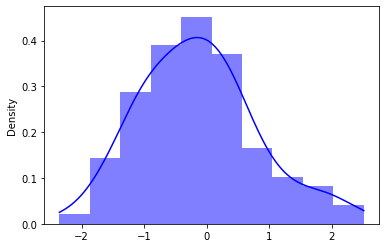

In [48]:
#Dưới đây là code để trực quan một dữ liệu sinh ngẫu nhiên theo phân phối chuẩn tắc
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
a = random.normal(size=100)
sns.histplot(a, color="blue", kde=True, stat="density", linewidth=0)
plt.show()

In [34]:
#Để tính toán xác suất liên quan đến phân phối chuẩn, ta dùng thư viện scipy như sau
import scipy.stats as st
print("Given x, find y = P(X <= x)")
print(st.norm.cdf(1.64))
print("Given y, find x such that P(X <= x) = y")
print(st.norm.ppf(.95))

Given x, find y = P(X <= x)
0.9494974165258963
Given y, find x such that P(X <= x) = y
1.6448536269514722


**Yêu cầu:** (thực hiện trong 1.5 tiết) <br>
*Từ các nội dung trên, hãy thực hiện các yêu cầu sau:* <br>
1. Giả sử $X$ là đại lượng ngẫu nhiên có phân bố chuẩn với kỳ vọng là $\mu = 2100$ và độ lệch chuẩn $\sigma = 200$. <br>
a) Hãy sinh ra dãy dữ liệu của $X$ với kích thước $100.$ <br>
b) Hãy dùng thư viện Seaborn, trực quan dữ liệu trên. <br>
c) Tính $P(X > 2400), P(1700 < X < 2200)$. <br>
d) Xác định $a, b$ sao cho $P(X <= a) = 0.56$ và $P(X > b) = 0.03$. <br>
<br>
2. Trọng lượng một con bò được nuôi trong trang trại là đại lượng ngẫu nhiên có phân bố chuẩn với kỳ vọng $250kg$ và độ lệch chuẩn $40kg$. <br>
a) Hãy sinh ra một bảng dữ liệu của $X$ với kích thước $10 \times 10.$ <br>
b) Hãy dùng thư viện Seaborn, trực quan dữ liệu trên. <br>
c) Tính xác suất để con bò nặng hơn $300kg$, nhẹ hơn $150kg$. <br>
d) Tính xác suất để khối lượng con bò trong khoảng $(250,270)kg.$ <br>
<br>
3. Thời gian từ nhà đi đến trường trong học kỳ vừa rồi của sinh viên Bình là một đại lượng ngẫu nhiên $X$ có phân bố chuẩn. Biết rằng $65\%$ số ngày thì Bình tốn hơn $20$ phút, còn $8 \%$ số ngày thì Bình tốn hơn $30.$ <br>
a) Tìm thời gian trung bình và độ lệch chuẩn của thời gian đi học của Bình. <br>
b) Nếu Bình xuất phát từ nhà vào $6h$ sáng thì xác suất Bình trễ tiết $1$ của IUH là bao nhiêu? <br>
c) Bình cần xuất phát vào lúc nào để xác suất kịp học tiết $10$ của IUH là $0.98$? <br>

## 2. LUẬT SỐ LỚN VÀ ĐỊNH LÝ GIỚI HẠN TRUNG TÂM

Ta có định lý sau đây (*giới hạn trung tâm*): Nếu đại lượng ngẫu nhiên $X$ là tổng của một số rất lớn các đại lượng ngẫu nhiên độc lập và sự đóng góp, ảnh hưởng của mỗi đại lượng là không đáng kể thì $X$ sẽ có phân bố chuẩn hoặc xấp xỉ một phân bố chuẩn. Điều này cho ta quy các bài toán phức tạp, khó tính toán được bằng cách thông thường, về phân phối chuẩn và giải quyết nó dễ dàng. <br>
Bên cạnh đó còn có quy tắc sau (*luật số lớn*): Giả sử $X_1, X_2, ..., X_n$ là dãy các đại lượng ngẫu nhiên độc lập có cùng phân bố và có kỳ vọng là $\mu$, phương sai là $\sigma^2$ thì trung bình cộng $X = \frac{X_1+X_2+...+X_n}{n}$ sẽ hội tụ tới $\mu.$ <br>
<br>
Bên dưới, ta sẽ nghiên cứu một số xấp xỉ của các phân bố quen thuộc dựa theo định lý và quy luật ở trên: <br>

1. Cho dãy $(X_n)$ là dãy các đại lượng ngẫu nhiên tuân theo phân bố nhị thức, trong đó với mỗi $n$ thì $X_n$ là phân bố nhị thức với tham số $(n,p_n).$ Giả sử rằng tồn tại giới hạn $\lim n \cdot p_n = \lambda.$ Khi đó $X_n$ tuân theo phân bố Poisson với tham số $\lambda.$ <br>
Như vậy, với $n$ khá lớn và $p_n$ bé thì xấp xỉ là tốt, thông thường thì $n>50$. <br>
2. Cho dãy $(X_n)$ là dãy các đại lượng ngẫu nhiên độc lập nhau có cùng một phân bố với kỳ vọng $EX = \mu$ và phương sai $DX = \sigma^2$. Đặt $$S_n = \frac{X_1+X_2+...+X_n - n \mu}{\sqrt{n \sigma^2}}$$ thì ta có $P(S_n < x) = P(Z < x)$ với $Z$ là phân bố chuẩn tắc. Chú ý thêm rằng với số nguyên x, ta có thể điều chỉnh $P(X > x) \to P(X > x+0.5)$ hoặc $P(X < x) \to P(X < x - 0.5)$ để xác suất xấp xỉ chuẩn hơn.

**Yêu cầu:** (thực hiện trong 1.5 tiết) <br>
*Từ các nội dung trên, hãy thực hiện các yêu cầu sau:* <br>
1. Một xưởng in sách thấy rằng trung bình một quyển sách $500$ trang thì có chứa $300$ lỗi. Tìm xác suất để trong một trang sách có đúng $2$ lỗi, có ít nhất $2$ lỗi? Hãy giải thích tại sao không làm trực tiếp mà phải dùng xấp xỉ, và lý do tại sao việc xấp xỉ ở đây là hợp lệ. <br>
2. Xác suất làm một chiếc đinh ốc không đúng quy cách là $0.015$ và người ta xếp đinh ốc vào từng hộp, mỗi hộp có $100$ cái. Tính xác suất để hộp chứa toàn đinh ốc đúng quy cách. Tìm $n$ sao cho xác suất để lấy được $100$ đinh ốc đúng quy cách trong $n$ cái là không nhỏ hơn $0.8$. <br>
3. Gieo một con xúc sắc đối xứng tổng cộng $30$ lần. Tính xác suất để tổng số nút thu được là không vượt quá $100$, là lớn hơn $120.$ <br>
4. Trong khu phố có: $180$ hộ dân có $2$ người có lượng nước sinh hoạt sử dụng là đại lượng ngẫu nhiên có giá trị trung bình $0.6m^3$, độ lệch chuẩn $0.04m^3$ và $50$ hộ có hơn $2$ người có lượng nước sinh hoạt sử dụng là đại lượng ngẫu nhiên có giá trị trung bình $1.9m^3$, độ lệch chuẩn $0.14m^3$. Tính xác suất để trong một ngày, khu phố đó dùng hơn $205m^3$ nước.